#  Importing  Libraries

In [97]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

#   Load Dataset

In [95]:
df = pd.read_csv("//content//spam.csv", encoding='ISO-8859-1')

In [49]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3097,ham,This is all just creepy and crazy to me.,NaN,NaN,NaN
3834,ham,I'm thinking that chennai forgot to come for a...,NaN,NaN,NaN
5303,ham,"I can. But it will tell quite long, cos i have...",NaN,NaN,NaN
4800,ham,The guy at the car shop who was flirting with ...,NaN,NaN,NaN
3646,ham,"Hey babe, my friend had to cancel, still up fo...",NaN,NaN,NaN


In [50]:
df.shape

(5572, 5)

In [51]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 3 Data Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [54]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
808,ham,I am taking half day leave bec i am not well
5307,ham,What you did in leave.
1808,ham,Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
2450,ham,K..give back my thanks.
2856,ham,Today i'm not workin but not free oso... Gee.....


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [57]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [59]:
# check for duplicate values
df.duplicated().sum()

403

In [60]:
df.duplicated().sum()

403

In [61]:
df.shape

(5572, 2)

#4.EDA

In [62]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
df['target'].value_counts()

,count
target,
ham,4825
spam,747


5  Visualizing  ham and spam

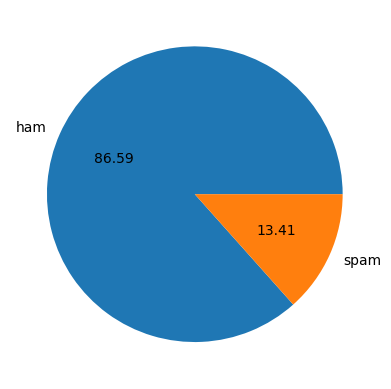

In [68]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# 6 Data is imbalanced

In [69]:
import nltk

In [70]:
!pip install nltk

In [71]:
df['num_characters'] = df['text'].apply(len)

In [72]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
import nltk

# Download the 'punkt' tokenizer
nltk.download('punkt')

# Now you can safely use the tokenizer
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [75]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5572.000000,5572.000000
mean,80.118808,18.699390
std,59.690841,13.741932
min,2.000000,1.000000
25%,36.000000,9.000000
50%,61.000000,15.000000
75%,121.000000,27.000000
max,910.000000,220.000000


In [76]:
# ham
df[df['target'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [77]:
#spam
df[df['target'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [78]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words'], dtype='object')

In [89]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']

# Encode the label column (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


<ipython-input-89-e22674d595ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [90]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['message'] = df['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#   7 Spliting models

In [91]:
X = df['message']
y = df['label']

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


#   8  make model

In [92]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# 10  Predecting x and y datasets

In [93]:
y_pred = model.predict(X_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 30 120]]


In [94]:
joblib.dump(model, 'sms_spam_classifier.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']